In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

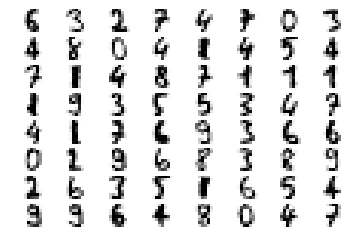

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.60621 stdev: 0.25911
Best fitness: 0.95424 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.538
Mean genetic distance 2.921, standard deviation 0.497
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 11.280 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.74825 stdev: 0.21424
Best fitness: 0.95424 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.663
Mean genetic distance 3.045, standard deviation 0.533
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.166 sec (11.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78547 stdev: 0.19352
Best fitness: 0.95424 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.676
Mean genetic distance 3.090, standard deviation 0.520
Population of 199 members in 28 species
Tot

Mean genetic distance 3.200, standard deviation 0.487
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 17.719 sec (16.644 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.55799 stdev: 0.21289
Best fitness: 0.83859 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.358
Mean genetic distance 2.868, standard deviation 0.461
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 14.574 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65682 stdev: 0.18907
Best fitness: 0.85962 - size: (3, 15) - species 3 - id 309
Average adjusted fitness: 0.482
Mean genetic distance 3.028, standard deviation 0.473
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 15.242 sec (14.908 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71099 stdev: 0.16609
Best fitness: 0.85962 

Population's average fitness: 0.61346 stdev: 0.09401
Best fitness: 0.84416 - size: (5, 19) - species 5 - id 686
Average adjusted fitness: 0.228
Mean genetic distance 3.121, standard deviation 0.491
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 17.820 sec (16.494 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55964 stdev: 0.21368
Best fitness: 0.88188 - size: (2, 13) - species 3 - id 156
Average adjusted fitness: 0.366
Mean genetic distance 2.874, standard deviation 0.482
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69199 stdev: 0.17832
Best fitness: 0.88188 - size: (2, 13) - species 3 - id 156
Average adjusted fitness: 0.436
Mean genetic distance 3.018, standard deviation 0.493
Population of 203 members in 30 species
Total extinctions: 0
Generation time

Mean genetic distance 3.132, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 16.399 sec (15.282 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61327 stdev: 0.08243
Best fitness: 0.73902 - size: (4, 16) - species 9 - id 933
Average adjusted fitness: 0.222
Mean genetic distance 3.165, standard deviation 0.517
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 16.429 sec (15.474 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54906 stdev: 0.14201
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 161
Average adjusted fitness: 0.308
Mean genetic distance 2.985, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61867 stdev: 0.12598
Best fitness: 0.76871

Population's average fitness: 0.56566 stdev: 0.06546
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.169
Mean genetic distance 3.061, standard deviation 0.491
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 16.350 sec (15.422 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56831 stdev: 0.06648
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.183
Mean genetic distance 3.088, standard deviation 0.492
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 16.724 sec (15.639 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.53422 stdev: 0.21534
Best fitness: 0.84106 - size: (2, 13) - species 1 - id 152
Average adjusted fitness: 0.404
Mean genetic distance 2.978, standard deviation 0.487
Population of 200 members in 26 species
Total extinctions:

Mean genetic distance 3.085, standard deviation 0.534
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.808 sec (14.836 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59313 stdev: 0.09272
Best fitness: 0.76994 - size: (3, 16) - species 5 - id 535
Average adjusted fitness: 0.232
Mean genetic distance 3.119, standard deviation 0.530
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 16.410 sec (15.151 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60361 stdev: 0.09330
Best fitness: 0.76994 - size: (3, 16) - species 5 - id 535
Average adjusted fitness: 0.243
Mean genetic distance 3.152, standard deviation 0.531
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.888 sec (15.274 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53870 stdev: 0.14837
Best

Population's average fitness: 0.56753 stdev: 0.07954
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 511
Average adjusted fitness: 0.250
Mean genetic distance 3.023, standard deviation 0.471
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 16.349 sec (15.327 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57326 stdev: 0.07853
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 511
Average adjusted fitness: 0.228
Mean genetic distance 3.071, standard deviation 0.468
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 16.635 sec (15.588 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57079 stdev: 0.08237
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 511
Average adjusted fitness: 0.263
Mean genetic distance 3.101, standard deviation 0.477
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 18.316 sec (16.043 average)
running:24

Mean genetic distance 3.121, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 15.442 sec (14.709 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57303 stdev: 0.08064
Best fitness: 0.74892 - size: (3, 15) - species 8 - id 425
Average adjusted fitness: 0.176
Mean genetic distance 3.135, standard deviation 0.500
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 16.096 sec (15.056 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58052 stdev: 0.08540
Best fitness: 0.75015 - size: (4, 16) - species 1 - id 802
Average adjusted fitness: 0.249
Mean genetic distance 3.152, standard deviation 0.488
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 16.509 sec (15.347 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59861 stdev: 0.08499
Best fitness: 0.75325 - size: (4, 19) - species 38 - id 916
Av

Population's average fitness: 0.55581 stdev: 0.08819
Best fitness: 0.69944 - size: (3, 15) - species 13 - id 266
Average adjusted fitness: 0.255
Mean genetic distance 3.061, standard deviation 0.470
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.051 sec (15.477 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57418 stdev: 0.08342
Best fitness: 0.75510 - size: (3, 15) - species 25 - id 667
Average adjusted fitness: 0.279
Mean genetic distance 3.107, standard deviation 0.477
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 17.460 sec (15.973 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59108 stdev: 0.08139
Best fitness: 0.76685 - size: (4, 18) - species 29 - id 761
Average adjusted fitness: 0.255
Mean genetic distance 3.123, standard deviation 0.475
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 16.961 sec (16.170 average)

 *****

Mean genetic distance 2.938, standard deviation 0.449
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 16.654 sec (15.819 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57829 stdev: 0.08387
Best fitness: 0.74644 - size: (3, 14) - species 4 - id 282
Average adjusted fitness: 0.262
Mean genetic distance 3.008, standard deviation 0.453
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 18.125 sec (16.588 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58020 stdev: 0.09106
Best fitness: 0.74644 - size: (3, 14) - species 4 - id 282
Average adjusted fitness: 0.218
Mean genetic distance 3.093, standard deviation 0.461
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.263 sec (17.257 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60222 stdev: 0.08755
Best fitness: 0.74644 - size: (3, 14) - species 31 - id 282
Av

Population's average fitness: 0.54729 stdev: 0.07777
Best fitness: 0.80952 - size: (2, 13) - species 18 - id 355
Average adjusted fitness: 0.160
Mean genetic distance 2.920, standard deviation 0.473
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.500 sec (15.370 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56438 stdev: 0.08308
Best fitness: 0.80952 - size: (2, 13) - species 22 - id 355
Average adjusted fitness: 0.185
Mean genetic distance 2.903, standard deviation 0.486
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 17.129 sec (15.957 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57767 stdev: 0.09371
Best fitness: 0.80952 - size: (2, 13) - species 22 - id 355
Average adjusted fitness: 0.246
Mean genetic distance 2.989, standard deviation 0.488
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 16.827 sec (16.174 average)

 *****

Mean genetic distance 2.876, standard deviation 0.483
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 18.094 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53797 stdev: 0.07649
Best fitness: 0.75696 - size: (3, 14) - species 7 - id 276
Average adjusted fitness: 0.240
Mean genetic distance 2.959, standard deviation 0.457
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 15.667 sec (16.881 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55516 stdev: 0.08424
Best fitness: 0.75696 - size: (3, 14) - species 12 - id 276
Average adjusted fitness: 0.265
Mean genetic distance 2.936, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.473 sec (16.745 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56404 stdev: 0.08821
Best fitness: 0.77427 - size: (2, 14) - species 14 - id 676
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.47457 stdev: 0.08689
Best fitness: 0.71181 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.227
Mean genetic distance 2.854, standard deviation 0.473
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53468 stdev: 0.10012
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 123
Average adjusted fitness: 0.254
Mean genetic distance 2.952, standard deviation 0.474
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 16.769 sec (17.065 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55173 stdev: 0.09464
Best fitness: 0.77737 - size: (4, 17) - species 1 - id 459
Average adjusted fitness: 0.228
Mean genetic distance 2.956, standard deviation 0.461
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.109 sec (18.0

Population's average fitness: 0.50199 stdev: 0.07059
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.236
Mean genetic distance 2.928, standard deviation 0.474
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52987 stdev: 0.07316
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.258
Mean genetic distance 2.997, standard deviation 0.446
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 17.084 sec (15.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54864 stdev: 0.07181
Best fitness: 0.74397 - size: (2, 14) - species 14 - id 523
Average adjusted fitness: 0.210
Mean genetic distance 3.016, standard deviation 0.462
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.308 sec (17.741 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48625 stdev: 0.09722
Best fitness: 0.75943 - size: (2, 13) - species 5 - id 167
Average adjusted fitness: 0.167
Mean genetic distance 2.980, standard deviation 0.485
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 15.519 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54618 stdev: 0.10093
Best fitness: 0.77242 - size: (3, 14) - species 4 - id 355
Average adjusted fitness: 0.232
Mean genetic distance 3.088, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 17.414 sec (16.467 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56651 stdev: 0.10464
Best fitness: 0.77242 - size: (3, 14) - species 26 - id 355
Average adjusted fitness: 0.249
Mean genetic distance 3.100, standard deviation 0.505
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 18.161 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46771 stdev: 0.10259
Best fitness: 0.74706 - size: (2, 13) - species 5 - id 35
Average adjusted fitness: 0.290
Mean genetic distance 2.933, standard deviation 0.516
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 15.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55159 stdev: 0.10361
Best fitness: 0.82375 - size: (3, 14) - species 5 - id 370
Average adjusted fitness: 0.283
Mean genetic distance 3.033, standard deviation 0.503
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.675 sec (16.266 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57358 stdev: 0.11058
Best fitness: 0.82437 - size: (3, 16) - species 5 - id 544
Average adjusted fitness: 0.271
Mean genetic distance 3.074, standard deviation 0.502
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 16.660 sec (16.39


 ****** Running generation 0 ****** 

Population's average fitness: 0.44280 stdev: 0.14576
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.213
Mean genetic distance 2.902, standard deviation 0.426
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 15.144 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54761 stdev: 0.15301
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 200
Average adjusted fitness: 0.300
Mean genetic distance 2.932, standard deviation 0.437
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.114 sec (15.629 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59041 stdev: 0.14550
Best fitness: 0.79159 - size: (3, 14) - species 10 - id 474
Average adjusted fitness: 0.272
Mean genetic distance 2.908, standard deviation 0.448
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 16.439 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51657 stdev: 0.09570
Best fitness: 0.71552 - size: (2, 13) - species 2 - id 193
Average adjusted fitness: 0.230
Mean genetic distance 2.924, standard deviation 0.462
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 16.764 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56332 stdev: 0.09787
Best fitness: 0.74088 - size: (2, 14) - species 7 - id 361
Average adjusted fitness: 0.278
Mean genetic distance 2.951, standard deviation 0.464
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 18.297 sec (17.530 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59435 stdev: 0.08777
Best fitness: 0.78108 - size: (2, 14) - species 27 - id 532
Average adjusted fitness: 0.261
Mean genetic distance 2.999, standard deviation 0.474
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.709 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49026 stdev: 0.06759
Best fitness: 0.71490 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.248
Mean genetic distance 2.866, standard deviation 0.449
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.873 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53536 stdev: 0.07159
Best fitness: 0.75881 - size: (3, 15) - species 19 - id 364
Average adjusted fitness: 0.226
Mean genetic distance 2.953, standard deviation 0.467
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 19.082 sec (18.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56037 stdev: 0.07833
Best fitness: 0.77056 - size: (4, 16) - species 21 - id 416
Average adjusted fitness: 0.173
Mean genetic distance 2.952, standard deviation 0.463
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.017 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49775 stdev: 0.07232
Best fitness: 0.78293 - size: (2, 13) - species 10 - id 50
Average adjusted fitness: 0.193
Mean genetic distance 2.873, standard deviation 0.465
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 23.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53085 stdev: 0.07704
Best fitness: 0.78293 - size: (2, 13) - species 10 - id 50
Average adjusted fitness: 0.216
Mean genetic distance 2.987, standard deviation 0.504
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 24.740 sec (24.350 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55323 stdev: 0.08089
Best fitness: 0.78293 - size: (2, 13) - species 10 - id 50
Average adjusted fitness: 0.220
Mean genetic distance 3.052, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 24.239 sec (24.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.48597 stdev: 0.09595
Best fitness: 0.71800 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.193
Mean genetic distance 2.900, standard deviation 0.461
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.047 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55003 stdev: 0.09028
Best fitness: 0.74212 - size: (3, 14) - species 11 - id 248
Average adjusted fitness: 0.212
Mean genetic distance 2.970, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.607 sec (21.827 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57138 stdev: 0.08933
Best fitness: 0.75943 - size: (3, 14) - species 2 - id 488
Average adjusted fitness: 0.244
Mean genetic distance 2.999, standard deviation 0.475
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.870 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49445 stdev: 0.07218
Best fitness: 0.75819 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.191
Mean genetic distance 2.886, standard deviation 0.481
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53987 stdev: 0.09179
Best fitness: 0.81818 - size: (3, 15) - species 1 - id 300
Average adjusted fitness: 0.242
Mean genetic distance 3.024, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.293 sec (20.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58242 stdev: 0.09969
Best fitness: 0.81942 - size: (4, 17) - species 20 - id 530
Average adjusted fitness: 0.320
Mean genetic distance 3.041, standard deviation 0.474
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.880 sec (21.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.47432 stdev: 0.10846
Best fitness: 0.74397 - size: (2, 13) - species 5 - id 176
Average adjusted fitness: 0.238
Mean genetic distance 2.883, standard deviation 0.478
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 19.508 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53586 stdev: 0.11171
Best fitness: 0.78602 - size: (2, 13) - species 1 - id 375
Average adjusted fitness: 0.227
Mean genetic distance 2.959, standard deviation 0.489
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.704 sec (20.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55886 stdev: 0.11436
Best fitness: 0.78602 - size: (2, 13) - species 1 - id 375
Average adjusted fitness: 0.248
Mean genetic distance 3.050, standard deviation 0.491
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 23.146 sec (21.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47808 stdev: 0.10125
Best fitness: 0.74212 - size: (2, 13) - species 1 - id 56
Average adjusted fitness: 0.223
Mean genetic distance 2.958, standard deviation 0.499
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.079 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53089 stdev: 0.10513
Best fitness: 0.74212 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.238
Mean genetic distance 3.024, standard deviation 0.484
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 19.802 sec (19.440 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55290 stdev: 0.10401
Best fitness: 0.74273 - size: (3, 14) - species 6 - id 470
Average adjusted fitness: 0.243
Mean genetic distance 3.047, standard deviation 0.470
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 21.133 sec (20.004


 ****** Running generation 0 ****** 

Population's average fitness: 0.45222 stdev: 0.14881
Best fitness: 0.81818 - size: (2, 13) - species 7 - id 81
Average adjusted fitness: 0.276
Mean genetic distance 2.851, standard deviation 0.462
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.149 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57020 stdev: 0.15136
Best fitness: 0.81818 - size: (2, 13) - species 7 - id 81
Average adjusted fitness: 0.359
Mean genetic distance 2.898, standard deviation 0.478
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 23.487 sec (21.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60625 stdev: 0.14003
Best fitness: 0.81818 - size: (2, 13) - species 7 - id 81
Average adjusted fitness: 0.352
Mean genetic distance 2.976, standard deviation 0.503
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.794 sec (21.477 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50365 stdev: 0.06424
Best fitness: 0.69759 - size: (2, 13) - species 4 - id 12
Average adjusted fitness: 0.239
Mean genetic distance 2.884, standard deviation 0.454
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.932 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53083 stdev: 0.06572
Best fitness: 0.70068 - size: (3, 15) - species 7 - id 336
Average adjusted fitness: 0.226
Mean genetic distance 3.013, standard deviation 0.479
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 20.779 sec (20.355 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54087 stdev: 0.07126
Best fitness: 0.72233 - size: (3, 14) - species 25 - id 523
Average adjusted fitness: 0.238
Mean genetic distance 3.043, standard deviation 0.484
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 22.404 sec (21.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47409 stdev: 0.09060
Best fitness: 0.71243 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.191
Mean genetic distance 2.878, standard deviation 0.449
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.347 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53301 stdev: 0.09049
Best fitness: 0.71243 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.219
Mean genetic distance 2.989, standard deviation 0.453
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.668 sec (20.008 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54919 stdev: 0.09120
Best fitness: 0.75943 - size: (3, 15) - species 8 - id 543
Average adjusted fitness: 0.236
Mean genetic distance 3.036, standard deviation 0.460
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.512 sec (20.842


 ****** Running generation 0 ****** 

Population's average fitness: 0.46692 stdev: 0.09958
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 151
Average adjusted fitness: 0.246
Mean genetic distance 2.874, standard deviation 0.476
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.036 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54375 stdev: 0.09626
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 151
Average adjusted fitness: 0.202
Mean genetic distance 2.983, standard deviation 0.468
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.916 sec (19.976 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55081 stdev: 0.10661
Best fitness: 0.73840 - size: (2, 13) - species 26 - id 151
Average adjusted fitness: 0.296
Mean genetic distance 3.008, standard deviation 0.486
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 21.066 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45734 stdev: 0.14845
Best fitness: 0.78664 - size: (2, 13) - species 5 - id 8
Average adjusted fitness: 0.194
Mean genetic distance 2.919, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.357 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53486 stdev: 0.15188
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.294
Mean genetic distance 2.968, standard deviation 0.485
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 23.238 sec (21.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58718 stdev: 0.14790
Best fitness: 0.81942 - size: (3, 15) - species 31 - id 533
Average adjusted fitness: 0.328
Mean genetic distance 3.029, standard deviation 0.503
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 30.129 sec (24.574 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49081 stdev: 0.10060
Best fitness: 0.70686 - size: (2, 13) - species 7 - id 79
Average adjusted fitness: 0.234
Mean genetic distance 2.892, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 22.488 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55057 stdev: 0.09155
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 379
Average adjusted fitness: 0.212
Mean genetic distance 2.941, standard deviation 0.483
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.189 sec (22.838 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56016 stdev: 0.08845
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 379
Average adjusted fitness: 0.204
Mean genetic distance 3.004, standard deviation 0.461
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 23.718 sec (23.13


 ****** Running generation 0 ****** 

Population's average fitness: 0.47130 stdev: 0.15060
Best fitness: 0.75448 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.254
Mean genetic distance 2.834, standard deviation 0.478
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.535 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57853 stdev: 0.14055
Best fitness: 0.77860 - size: (3, 14) - species 15 - id 259
Average adjusted fitness: 0.293
Mean genetic distance 3.011, standard deviation 0.507
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.524 sec (23.530 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60956 stdev: 0.13842
Best fitness: 0.77860 - size: (3, 14) - species 15 - id 259
Average adjusted fitness: 0.360
Mean genetic distance 3.113, standard deviation 0.529
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.061 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44660 stdev: 0.14186
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 145
Average adjusted fitness: 0.235
Mean genetic distance 2.935, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.662 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53628 stdev: 0.15290
Best fitness: 0.74583 - size: (3, 13) - species 12 - id 284
Average adjusted fitness: 0.369
Mean genetic distance 3.002, standard deviation 0.476
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 25.713 sec (24.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56882 stdev: 0.15141
Best fitness: 0.74706 - size: (3, 12) - species 12 - id 533
Average adjusted fitness: 0.337
Mean genetic distance 3.024, standard deviation 0.470
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 25.583 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.44040 stdev: 0.21323
Best fitness: 0.82931 - size: (2, 13) - species 3 - id 23
Average adjusted fitness: 0.285
Mean genetic distance 2.865, standard deviation 0.449
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.646 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58069 stdev: 0.20291
Best fitness: 0.87137 - size: (3, 15) - species 3 - id 385
Average adjusted fitness: 0.365
Mean genetic distance 2.982, standard deviation 0.474
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 28.098 sec (27.372 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62990 stdev: 0.21131
Best fitness: 0.87322 - size: (2, 13) - species 6 - id 530
Average adjusted fitness: 0.415
Mean genetic distance 3.014, standard deviation 0.491
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 28.676 sec (27.80


 ****** Running generation 0 ****** 

Population's average fitness: 0.51893 stdev: 0.08656
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 188
Average adjusted fitness: 0.200
Mean genetic distance 2.975, standard deviation 0.530
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 28.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55925 stdev: 0.09110
Best fitness: 0.72356 - size: (3, 15) - species 5 - id 337
Average adjusted fitness: 0.269
Mean genetic distance 3.096, standard deviation 0.518
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 25.620 sec (26.821 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58990 stdev: 0.08940
Best fitness: 0.72418 - size: (3, 15) - species 24 - id 525
Average adjusted fitness: 0.244
Mean genetic distance 3.115, standard deviation 0.496
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 29.177 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49533 stdev: 0.05785
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 160
Average adjusted fitness: 0.188
Mean genetic distance 2.910, standard deviation 0.490
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.900 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53161 stdev: 0.06351
Best fitness: 0.70006 - size: (3, 14) - species 6 - id 329
Average adjusted fitness: 0.244
Mean genetic distance 2.991, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.707 sec (20.804 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54427 stdev: 0.06663
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 439
Average adjusted fitness: 0.232
Mean genetic distance 3.015, standard deviation 0.487
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 23.519 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.49859 stdev: 0.06802
Best fitness: 0.70315 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.241
Mean genetic distance 2.856, standard deviation 0.469
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 20.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54591 stdev: 0.07009
Best fitness: 0.75819 - size: (3, 15) - species 16 - id 386
Average adjusted fitness: 0.240
Mean genetic distance 3.016, standard deviation 0.482
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 22.038 sec (21.347 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55506 stdev: 0.08389
Best fitness: 0.75819 - size: (3, 15) - species 16 - id 386
Average adjusted fitness: 0.228
Mean genetic distance 3.039, standard deviation 0.465
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.703 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47672 stdev: 0.08545
Best fitness: 0.67965 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.147
Mean genetic distance 2.906, standard deviation 0.466
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 20.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52345 stdev: 0.08895
Best fitness: 0.71861 - size: (3, 14) - species 27 - id 371
Average adjusted fitness: 0.172
Mean genetic distance 2.953, standard deviation 0.494
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 24.635 sec (22.501 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55690 stdev: 0.08793
Best fitness: 0.72418 - size: (3, 14) - species 27 - id 542
Average adjusted fitness: 0.243
Mean genetic distance 2.986, standard deviation 0.496
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 29.317 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.50017 stdev: 0.06520
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 106
Average adjusted fitness: 0.236
Mean genetic distance 2.923, standard deviation 0.451
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53486 stdev: 0.07251
Best fitness: 0.73346 - size: (3, 15) - species 2 - id 310
Average adjusted fitness: 0.170
Mean genetic distance 2.992, standard deviation 0.448
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 22.742 sec (21.635 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55917 stdev: 0.07941
Best fitness: 0.73902 - size: (4, 17) - species 32 - id 521
Average adjusted fitness: 0.198
Mean genetic distance 3.035, standard deviation 0.473
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 24.734 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47310 stdev: 0.09635
Best fitness: 0.70130 - size: (2, 13) - species 4 - id 68
Average adjusted fitness: 0.242
Mean genetic distance 2.877, standard deviation 0.486
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 23.034 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53944 stdev: 0.08469
Best fitness: 0.70254 - size: (3, 15) - species 1 - id 236
Average adjusted fitness: 0.286
Mean genetic distance 2.934, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 28.898 sec (25.966 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55509 stdev: 0.08557
Best fitness: 0.72727 - size: (3, 15) - species 3 - id 483
Average adjusted fitness: 0.279
Mean genetic distance 2.966, standard deviation 0.498
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 26.582 sec (26.17


 ****** Running generation 0 ****** 

Population's average fitness: 0.48891 stdev: 0.09686
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 57
Average adjusted fitness: 0.236
Mean genetic distance 2.935, standard deviation 0.511
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 28.319 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53152 stdev: 0.10270
Best fitness: 0.73098 - size: (3, 15) - species 8 - id 367
Average adjusted fitness: 0.232
Mean genetic distance 3.042, standard deviation 0.497
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 31.192 sec (29.756 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57095 stdev: 0.08975
Best fitness: 0.73840 - size: (4, 14) - species 18 - id 517
Average adjusted fitness: 0.237
Mean genetic distance 3.032, standard deviation 0.474
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 30.267 sec (29.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47055 stdev: 0.14125
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 190
Average adjusted fitness: 0.267
Mean genetic distance 2.964, standard deviation 0.506
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 24.114 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56567 stdev: 0.14445
Best fitness: 0.75943 - size: (3, 13) - species 7 - id 230
Average adjusted fitness: 0.332
Mean genetic distance 3.049, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.098 sec (24.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61783 stdev: 0.12447
Best fitness: 0.75943 - size: (3, 13) - species 7 - id 230
Average adjusted fitness: 0.332
Mean genetic distance 3.094, standard deviation 0.490
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 28.254 sec (25.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49632 stdev: 0.05368
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 195
Average adjusted fitness: 0.157
Mean genetic distance 2.897, standard deviation 0.465
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 28.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53073 stdev: 0.05385
Best fitness: 0.69202 - size: (2, 13) - species 6 - id 195
Average adjusted fitness: 0.172
Mean genetic distance 3.002, standard deviation 0.493
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 34.000 sec (31.273 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53913 stdev: 0.05706
Best fitness: 0.69202 - size: (2, 13) - species 23 - id 195
Average adjusted fitness: 0.160
Mean genetic distance 3.061, standard deviation 0.514
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 27.093 sec (29.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48416 stdev: 0.08418
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.206
Mean genetic distance 2.941, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 24.156 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54487 stdev: 0.08246
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 9
Average adjusted fitness: 0.258
Mean genetic distance 3.053, standard deviation 0.521
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.772 sec (23.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55772 stdev: 0.08699
Best fitness: 0.77180 - size: (4, 16) - species 21 - id 416
Average adjusted fitness: 0.278
Mean genetic distance 3.073, standard deviation 0.533
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 24.751 sec (24.226 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48267 stdev: 0.09257
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.169
Mean genetic distance 2.894, standard deviation 0.488
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 23.154 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53494 stdev: 0.10083
Best fitness: 0.72418 - size: (2, 14) - species 3 - id 317
Average adjusted fitness: 0.262
Mean genetic distance 3.032, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.270 sec (24.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55846 stdev: 0.09921
Best fitness: 0.75943 - size: (4, 17) - species 25 - id 445
Average adjusted fitness: 0.230
Mean genetic distance 3.073, standard deviation 0.503
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 29.189 sec (26.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.45387 stdev: 0.14390
Best fitness: 0.70872 - size: (2, 13) - species 6 - id 62
Average adjusted fitness: 0.243
Mean genetic distance 2.867, standard deviation 0.468
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53831 stdev: 0.14850
Best fitness: 0.72047 - size: (2, 13) - species 8 - id 218
Average adjusted fitness: 0.272
Mean genetic distance 2.983, standard deviation 0.505
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 25.607 sec (24.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58721 stdev: 0.13085
Best fitness: 0.72356 - size: (4, 17) - species 13 - id 459
Average adjusted fitness: 0.283
Mean genetic distance 3.038, standard deviation 0.512
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.516 sec (24.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47561 stdev: 0.08193
Best fitness: 0.66976 - size: (2, 13) - species 3 - id 40
Average adjusted fitness: 0.164
Mean genetic distance 2.862, standard deviation 0.450
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 34.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53227 stdev: 0.08784
Best fitness: 0.70625 - size: (3, 14) - species 3 - id 255
Average adjusted fitness: 0.202
Mean genetic distance 2.934, standard deviation 0.465
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 33.955 sec (34.323 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55476 stdev: 0.07977
Best fitness: 0.70996 - size: (2, 14) - species 18 - id 520
Average adjusted fitness: 0.180
Mean genetic distance 2.966, standard deviation 0.477
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 28.861 sec (32.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47358 stdev: 0.13977
Best fitness: 0.74150 - size: (2, 13) - species 4 - id 51
Average adjusted fitness: 0.180
Mean genetic distance 2.960, standard deviation 0.477
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.580 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55079 stdev: 0.13437
Best fitness: 0.76500 - size: (3, 15) - species 6 - id 237
Average adjusted fitness: 0.212
Mean genetic distance 3.018, standard deviation 0.469
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 20.418 sec (19.999 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56399 stdev: 0.14127
Best fitness: 0.76500 - size: (3, 15) - species 6 - id 237
Average adjusted fitness: 0.265
Mean genetic distance 3.035, standard deviation 0.462
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 21.841 sec (20.61


 ****** Running generation 0 ****** 

Population's average fitness: 0.45395 stdev: 0.14767
Best fitness: 0.73964 - size: (2, 13) - species 2 - id 15
Average adjusted fitness: 0.205
Mean genetic distance 2.883, standard deviation 0.474
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56399 stdev: 0.14683
Best fitness: 0.76685 - size: (2, 12) - species 2 - id 372
Average adjusted fitness: 0.268
Mean genetic distance 2.992, standard deviation 0.488
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 28.366 sec (24.694 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60634 stdev: 0.12772
Best fitness: 0.77737 - size: (3, 14) - species 2 - id 540
Average adjusted fitness: 0.304
Mean genetic distance 3.025, standard deviation 0.470
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.754 sec (24.38


 ****** Running generation 0 ****** 

Population's average fitness: 0.41729 stdev: 0.20786
Best fitness: 0.81880 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.289
Mean genetic distance 2.903, standard deviation 0.476
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 27.681 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56546 stdev: 0.21096
Best fitness: 0.81880 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.353
Mean genetic distance 3.024, standard deviation 0.471
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 31.128 sec (29.404 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64202 stdev: 0.18966
Best fitness: 0.81880 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.409
Mean genetic distance 3.085, standard deviation 0.492
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 28.946 sec (29.252 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49702 stdev: 0.07943
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.204
Mean genetic distance 2.873, standard deviation 0.472
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 23.835 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54054 stdev: 0.08765
Best fitness: 0.73469 - size: (3, 15) - species 7 - id 242
Average adjusted fitness: 0.207
Mean genetic distance 3.014, standard deviation 0.484
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 26.799 sec (25.317 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55682 stdev: 0.09134
Best fitness: 0.76809 - size: (3, 15) - species 7 - id 533
Average adjusted fitness: 0.251
Mean genetic distance 3.080, standard deviation 0.465
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 27.179 sec (25.93


 ****** Running generation 0 ****** 

Population's average fitness: 0.48162 stdev: 0.09633
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 108
Average adjusted fitness: 0.226
Mean genetic distance 2.915, standard deviation 0.492
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 21.803 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53882 stdev: 0.09932
Best fitness: 0.76314 - size: (3, 14) - species 18 - id 336
Average adjusted fitness: 0.233
Mean genetic distance 2.990, standard deviation 0.491
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 23.860 sec (22.831 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57383 stdev: 0.09584
Best fitness: 0.77984 - size: (3, 13) - species 22 - id 538
Average adjusted fitness: 0.248
Mean genetic distance 2.992, standard deviation 0.467
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 26.867 sec (24


 ****** Running generation 0 ****** 

Population's average fitness: 0.46930 stdev: 0.09952
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 23
Average adjusted fitness: 0.198
Mean genetic distance 2.928, standard deviation 0.463
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52535 stdev: 0.10362
Best fitness: 0.78046 - size: (3, 14) - species 4 - id 375
Average adjusted fitness: 0.239
Mean genetic distance 3.005, standard deviation 0.474
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 25.473 sec (24.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54206 stdev: 0.10339
Best fitness: 0.78046 - size: (3, 14) - species 4 - id 375
Average adjusted fitness: 0.276
Mean genetic distance 3.047, standard deviation 0.475
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 28.917 sec (26.24


 ****** Running generation 0 ****** 

Population's average fitness: 0.44692 stdev: 0.14731
Best fitness: 0.79035 - size: (2, 13) - species 5 - id 119
Average adjusted fitness: 0.197
Mean genetic distance 2.897, standard deviation 0.473
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57405 stdev: 0.13196
Best fitness: 0.80458 - size: (3, 14) - species 24 - id 377
Average adjusted fitness: 0.332
Mean genetic distance 3.018, standard deviation 0.496
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 29.340 sec (25.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60868 stdev: 0.13274
Best fitness: 0.81571 - size: (4, 15) - species 24 - id 531
Average adjusted fitness: 0.376
Mean genetic distance 3.023, standard deviation 0.481
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 24.705 sec (25


 ****** Running generation 0 ****** 

Population's average fitness: 0.48476 stdev: 0.10625
Best fitness: 0.73222 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.269
Mean genetic distance 2.958, standard deviation 0.535
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 21.695 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54594 stdev: 0.10899
Best fitness: 0.76685 - size: (3, 14) - species 5 - id 296
Average adjusted fitness: 0.207
Mean genetic distance 3.011, standard deviation 0.516
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 24.799 sec (23.247 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56195 stdev: 0.11917
Best fitness: 0.76871 - size: (4, 17) - species 5 - id 532
Average adjusted fitness: 0.255
Mean genetic distance 3.092, standard deviation 0.532
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 21.340 sec (22.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.47693 stdev: 0.15750
Best fitness: 0.83921 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.217
Mean genetic distance 2.879, standard deviation 0.485
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55581 stdev: 0.16573
Best fitness: 0.88745 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.390
Mean genetic distance 3.005, standard deviation 0.497
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 20.415 sec (19.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60082 stdev: 0.15169
Best fitness: 0.88745 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.284
Mean genetic distance 3.038, standard deviation 0.486
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 21.463 sec (20.26


 ****** Running generation 0 ****** 

Population's average fitness: 0.44122 stdev: 0.15919
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.297
Mean genetic distance 2.854, standard deviation 0.455
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57341 stdev: 0.16260
Best fitness: 0.79654 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.330
Mean genetic distance 2.986, standard deviation 0.463
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 24.765 sec (22.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59954 stdev: 0.15434
Best fitness: 0.79654 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.373
Mean genetic distance 3.064, standard deviation 0.462
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 24.466 sec (22.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.44673 stdev: 0.20503
Best fitness: 0.80272 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.230
Mean genetic distance 2.873, standard deviation 0.481
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 20.574 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60808 stdev: 0.20454
Best fitness: 0.82684 - size: (3, 15) - species 2 - id 291
Average adjusted fitness: 0.422
Mean genetic distance 2.977, standard deviation 0.484
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.502 sec (23.538 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64014 stdev: 0.19888
Best fitness: 0.85096 - size: (4, 17) - species 6 - id 522
Average adjusted fitness: 0.421
Mean genetic distance 3.078, standard deviation 0.494
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.354 sec (23.81


 ****** Running generation 0 ****** 

Population's average fitness: 0.48606 stdev: 0.08483
Best fitness: 0.68460 - size: (2, 13) - species 6 - id 161
Average adjusted fitness: 0.206
Mean genetic distance 2.876, standard deviation 0.462
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 20.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53841 stdev: 0.08882
Best fitness: 0.70686 - size: (3, 15) - species 9 - id 268
Average adjusted fitness: 0.239
Mean genetic distance 2.970, standard deviation 0.467
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 23.983 sec (22.322 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54291 stdev: 0.09486
Best fitness: 0.70686 - size: (3, 15) - species 8 - id 268
Average adjusted fitness: 0.203
Mean genetic distance 2.947, standard deviation 0.479
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 22.584 sec (22.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.45387 stdev: 0.13624
Best fitness: 0.73098 - size: (2, 13) - species 5 - id 148
Average adjusted fitness: 0.241
Mean genetic distance 2.916, standard deviation 0.507
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 25.332 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54327 stdev: 0.14420
Best fitness: 0.74397 - size: (3, 15) - species 3 - id 212
Average adjusted fitness: 0.292
Mean genetic distance 2.988, standard deviation 0.498
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 25.172 sec (25.252 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60931 stdev: 0.13830
Best fitness: 0.75881 - size: (4, 17) - species 23 - id 472
Average adjusted fitness: 0.355
Mean genetic distance 3.030, standard deviation 0.481
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.914 sec (25.

Mean genetic distance 3.130, standard deviation 0.496
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 24.606 sec (25.581 average)
running:235/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.44234 stdev: 0.14867
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.173
Mean genetic distance 2.856, standard deviation 0.491
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 20.587 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56483 stdev: 0.14808
Best fitness: 0.77180 - size: (2, 13) - species 4 - id 216
Average adjusted fitness: 0.306
Mean genetic distance 2.970, standard deviation 0.500
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 23.409 sec (21.998 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60749 stdev: 0.12909
Best fitness: 0.7718

Population's average fitness: 0.62558 stdev: 0.11811
Best fitness: 0.79035 - size: (3, 15) - species 29 - id 651
Average adjusted fitness: 0.319
Mean genetic distance 3.099, standard deviation 0.443
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 27.837 sec (23.006 average)
running:239/511
number of class1:1290
number of class2:327

 ****** Running generation 0 ****** 

Population's average fitness: 0.44246 stdev: 0.20525
Best fitness: 0.80210 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.287
Mean genetic distance 2.888, standard deviation 0.492
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57540 stdev: 0.20322
Best fitness: 0.80952 - size: (3, 15) - species 10 - id 222
Average adjusted fitness: 0.347
Mean genetic distance 2.965, standard deviation 0.496
Population of 201 members in 22 species
Total extinctions: 0
Generation 

Mean genetic distance 3.139, standard deviation 0.520
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 23.840 sec (22.675 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57557 stdev: 0.07479
Best fitness: 0.73902 - size: (3, 14) - species 12 - id 937
Average adjusted fitness: 0.189
Mean genetic distance 3.121, standard deviation 0.526
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 23.622 sec (22.833 average)
running:243/511
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.47089 stdev: 0.14693
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.230
Mean genetic distance 2.963, standard deviation 0.511
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.868 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56321 stdev: 0.14622
Best fitness: 0.752

Population's average fitness: 0.62765 stdev: 0.12116
Best fitness: 0.76005 - size: (4, 16) - species 26 - id 472
Average adjusted fitness: 0.349
Mean genetic distance 3.046, standard deviation 0.460
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 24.331 sec (22.297 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62842 stdev: 0.11335
Best fitness: 0.77180 - size: (4, 17) - species 30 - id 945
Average adjusted fitness: 0.332
Mean genetic distance 3.052, standard deviation 0.460
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 25.329 sec (22.802 average)
running:247/511
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.45681 stdev: 0.20971
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.286
Mean genetic distance 2.939, standard deviation 0.488
Population of 201 members in 24 species
Total extinctio

Mean genetic distance 3.078, standard deviation 0.463
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 38.910 sec (24.181 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61688 stdev: 0.13282
Best fitness: 0.77242 - size: (4, 17) - species 16 - id 789
Average adjusted fitness: 0.324
Mean genetic distance 3.099, standard deviation 0.456
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 40.324 sec (27.410 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62994 stdev: 0.12944
Best fitness: 0.77242 - size: (4, 17) - species 16 - id 789
Average adjusted fitness: 0.352
Mean genetic distance 3.114, standard deviation 0.465
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 31.128 sec (28.030 average)
running:251/511
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.47400 stdev: 0.21013
B

Population's average fitness: 0.68970 stdev: 0.16840
Best fitness: 0.83426 - size: (2, 14) - species 16 - id 284
Average adjusted fitness: 0.481
Mean genetic distance 3.054, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 23.663 sec (23.548 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71017 stdev: 0.14140
Best fitness: 0.83426 - size: (2, 14) - species 16 - id 284
Average adjusted fitness: 0.507
Mean genetic distance 3.054, standard deviation 0.525
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.602 sec (23.758 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72423 stdev: 0.13278
Best fitness: 0.83426 - size: (2, 14) - species 16 - id 284
Average adjusted fitness: 0.518
Mean genetic distance 3.032, standard deviation 0.525
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 29.263 sec (24.676 average)
running

Mean genetic distance 3.027, standard deviation 0.485
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 19.072 sec (17.782 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64368 stdev: 0.11103
Best fitness: 0.76500 - size: (4, 17) - species 19 - id 488
Average adjusted fitness: 0.351
Mean genetic distance 3.076, standard deviation 0.495
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 19.388 sec (18.184 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64923 stdev: 0.10353
Best fitness: 0.77056 - size: (5, 19) - species 11 - id 841
Average adjusted fitness: 0.335
Mean genetic distance 3.087, standard deviation 0.501
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 20.569 sec (18.661 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65680 stdev: 0.11210
Best fitness: 0.77304 - size: (5, 17) - species 11 - id 985


Population's average fitness: 0.56356 stdev: 0.08033
Best fitness: 0.71490 - size: (3, 16) - species 23 - id 490
Average adjusted fitness: 0.201
Mean genetic distance 3.006, standard deviation 0.463
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 18.854 sec (18.764 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58212 stdev: 0.08259
Best fitness: 0.71490 - size: (3, 16) - species 23 - id 490
Average adjusted fitness: 0.226
Mean genetic distance 3.072, standard deviation 0.468
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.135 sec (18.857 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58692 stdev: 0.07913
Best fitness: 0.71490 - size: (3, 16) - species 23 - id 490
Average adjusted fitness: 0.231
Mean genetic distance 3.068, standard deviation 0.487
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 21.829 sec (19.451 average)

 *****

Mean genetic distance 2.972, standard deviation 0.463
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.615 sec (19.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57574 stdev: 0.08123
Best fitness: 0.78417 - size: (4, 17) - species 20 - id 538
Average adjusted fitness: 0.226
Mean genetic distance 2.997, standard deviation 0.485
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.969 sec (19.473 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58234 stdev: 0.08633
Best fitness: 0.78417 - size: (4, 17) - species 7 - id 538
Average adjusted fitness: 0.281
Mean genetic distance 2.996, standard deviation 0.471
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.306 sec (19.431 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58491 stdev: 0.09059
Best fitness: 0.78417 - size: (4, 17) - species 23 - id 538
A

Population's average fitness: 0.53808 stdev: 0.05772
Best fitness: 0.71985 - size: (2, 14) - species 7 - id 363
Average adjusted fitness: 0.166
Mean genetic distance 2.987, standard deviation 0.495
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 21.336 sec (22.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54470 stdev: 0.06511
Best fitness: 0.73469 - size: (2, 13) - species 7 - id 530
Average adjusted fitness: 0.141
Mean genetic distance 3.012, standard deviation 0.461
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.079 sec (22.099 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55043 stdev: 0.06301
Best fitness: 0.73469 - size: (2, 13) - species 7 - id 530
Average adjusted fitness: 0.154
Mean genetic distance 2.990, standard deviation 0.472
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.937 sec (22.058 average)

 ****** R

Mean genetic distance 2.832, standard deviation 0.434
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.378 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55663 stdev: 0.07305
Best fitness: 0.67285 - size: (3, 12) - species 6 - id 255
Average adjusted fitness: 0.177
Mean genetic distance 2.953, standard deviation 0.468
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 24.148 sec (22.263 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57605 stdev: 0.06323
Best fitness: 0.69388 - size: (4, 16) - species 19 - id 533
Average adjusted fitness: 0.221
Mean genetic distance 2.959, standard deviation 0.460
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 22.457 sec (22.328 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57442 stdev: 0.06961
Best fitness: 0.69388 - size: (4, 16) - species 19 - id 533
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.49589 stdev: 0.05486
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.179
Mean genetic distance 2.791, standard deviation 0.449
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.741 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52387 stdev: 0.05721
Best fitness: 0.73098 - size: (3, 13) - species 16 - id 341
Average adjusted fitness: 0.142
Mean genetic distance 2.906, standard deviation 0.467
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 21.371 sec (20.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53793 stdev: 0.06874
Best fitness: 0.73098 - size: (3, 13) - species 16 - id 341
Average adjusted fitness: 0.185
Mean genetic distance 2.980, standard deviation 0.460
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 22.847 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.49407 stdev: 0.05896
Best fitness: 0.67223 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.198
Mean genetic distance 2.829, standard deviation 0.405
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.994 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53051 stdev: 0.07027
Best fitness: 0.70996 - size: (3, 15) - species 2 - id 303
Average adjusted fitness: 0.194
Mean genetic distance 2.917, standard deviation 0.456
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.506 sec (19.750 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55327 stdev: 0.06957
Best fitness: 0.70996 - size: (3, 15) - species 2 - id 303
Average adjusted fitness: 0.208
Mean genetic distance 2.986, standard deviation 0.468
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 22.360 sec (20.62


 ****** Running generation 0 ****** 

Population's average fitness: 0.47624 stdev: 0.09084
Best fitness: 0.73469 - size: (2, 13) - species 5 - id 99
Average adjusted fitness: 0.199
Mean genetic distance 2.747, standard deviation 0.436
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 21.547 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54616 stdev: 0.08617
Best fitness: 0.73469 - size: (2, 13) - species 5 - id 99
Average adjusted fitness: 0.167
Mean genetic distance 2.883, standard deviation 0.475
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 20.969 sec (21.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56564 stdev: 0.08666
Best fitness: 0.73840 - size: (3, 16) - species 5 - id 549
Average adjusted fitness: 0.179
Mean genetic distance 2.953, standard deviation 0.501
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 21.405 sec (21.307


 ****** Running generation 0 ****** 

Population's average fitness: 0.51267 stdev: 0.09051
Best fitness: 0.69079 - size: (2, 13) - species 5 - id 199
Average adjusted fitness: 0.180
Mean genetic distance 2.863, standard deviation 0.457
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 22.002 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55697 stdev: 0.08262
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 339
Average adjusted fitness: 0.234
Mean genetic distance 2.968, standard deviation 0.478
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.249 sec (22.626 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57528 stdev: 0.08404
Best fitness: 0.71923 - size: (4, 16) - species 1 - id 545
Average adjusted fitness: 0.235
Mean genetic distance 2.983, standard deviation 0.474
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 23.911 sec (23.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.50260 stdev: 0.06290
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.154
Mean genetic distance 2.883, standard deviation 0.481
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.453 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53002 stdev: 0.07770
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 133
Average adjusted fitness: 0.198
Mean genetic distance 3.052, standard deviation 0.483
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.829 sec (19.641 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54962 stdev: 0.08037
Best fitness: 0.77242 - size: (4, 17) - species 21 - id 510
Average adjusted fitness: 0.183
Mean genetic distance 3.010, standard deviation 0.502
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.205 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48705 stdev: 0.07475
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.228
Mean genetic distance 2.886, standard deviation 0.437
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.133 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55250 stdev: 0.08607
Best fitness: 0.78169 - size: (3, 15) - species 8 - id 342
Average adjusted fitness: 0.229
Mean genetic distance 2.959, standard deviation 0.435
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.142 sec (18.137 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58361 stdev: 0.09107
Best fitness: 0.78602 - size: (3, 15) - species 14 - id 506
Average adjusted fitness: 0.204
Mean genetic distance 2.968, standard deviation 0.435
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.227 sec (18.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47925 stdev: 0.10005
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.219
Mean genetic distance 2.833, standard deviation 0.465
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 16.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55147 stdev: 0.10839
Best fitness: 0.78355 - size: (2, 14) - species 2 - id 254
Average adjusted fitness: 0.291
Mean genetic distance 2.955, standard deviation 0.523
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.562 sec (16.961 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56911 stdev: 0.11758
Best fitness: 0.78355 - size: (2, 14) - species 2 - id 254
Average adjusted fitness: 0.302
Mean genetic distance 3.075, standard deviation 0.526
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.241 sec (17.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.50182 stdev: 0.05254
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 169
Average adjusted fitness: 0.173
Mean genetic distance 2.891, standard deviation 0.486
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 16.048 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53598 stdev: 0.06080
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 169
Average adjusted fitness: 0.212
Mean genetic distance 2.952, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.040 sec (17.044 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55105 stdev: 0.06956
Best fitness: 0.75696 - size: (4, 17) - species 6 - id 497
Average adjusted fitness: 0.198
Mean genetic distance 2.998, standard deviation 0.510
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 17.945 sec (17.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.48568 stdev: 0.08452
Best fitness: 0.69264 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.230
Mean genetic distance 2.939, standard deviation 0.507
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.135 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53109 stdev: 0.09884
Best fitness: 0.75015 - size: (3, 15) - species 4 - id 271
Average adjusted fitness: 0.285
Mean genetic distance 3.039, standard deviation 0.539
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.388 sec (16.761 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56903 stdev: 0.08961
Best fitness: 0.75325 - size: (3, 15) - species 15 - id 463
Average adjusted fitness: 0.214
Mean genetic distance 3.053, standard deviation 0.534
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 17.404 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47776 stdev: 0.10857
Best fitness: 0.77675 - size: (2, 13) - species 2 - id 127
Average adjusted fitness: 0.248
Mean genetic distance 2.849, standard deviation 0.445
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 15.920 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55343 stdev: 0.11392
Best fitness: 0.79468 - size: (3, 15) - species 9 - id 362
Average adjusted fitness: 0.270
Mean genetic distance 2.912, standard deviation 0.466
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.312 sec (16.616 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57178 stdev: 0.12422
Best fitness: 0.79716 - size: (4, 17) - species 7 - id 532
Average adjusted fitness: 0.295
Mean genetic distance 2.990, standard deviation 0.472
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 17.666 sec (16.9

Population's average fitness: 0.45390 stdev: 0.15161
Best fitness: 0.79035 - size: (2, 13) - species 2 - id 42
Average adjusted fitness: 0.285
Mean genetic distance 2.837, standard deviation 0.445
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 13.388 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57203 stdev: 0.15362
Best fitness: 0.81818 - size: (2, 12) - species 5 - id 383
Average adjusted fitness: 0.301
Mean genetic distance 2.933, standard deviation 0.471
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 14.506 sec (13.947 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58908 stdev: 0.16113
Best fitness: 0.82251 - size: (3, 15) - species 2 - id 523
Average adjusted fitness: 0.367
Mean genetic distance 3.000, standard deviation 0.481
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 15.782 sec (14.559 average)

 ****** Running generation 

Population's average fitness: 0.50519 stdev: 0.07749
Best fitness: 0.67594 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.162
Mean genetic distance 2.924, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54477 stdev: 0.07409
Best fitness: 0.67594 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.171
Mean genetic distance 2.994, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.126 sec (13.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56496 stdev: 0.06489
Best fitness: 0.67594 - size: (2, 13) - species 23 - id 147
Average adjusted fitness: 0.158
Mean genetic distance 3.040, standard deviation 0.498
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 14.680 sec (13.977 average)

 ****** Running generatio

Population's average fitness: 0.50390 stdev: 0.04670
Best fitness: 0.65182 - size: (2, 13) - species 2 - id 156
Average adjusted fitness: 0.203
Mean genetic distance 2.856, standard deviation 0.451
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.002 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52436 stdev: 0.05236
Best fitness: 0.70439 - size: (3, 14) - species 2 - id 260
Average adjusted fitness: 0.127
Mean genetic distance 2.997, standard deviation 0.500
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.384 sec (13.693 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53814 stdev: 0.05810
Best fitness: 0.70996 - size: (3, 13) - species 20 - id 505
Average adjusted fitness: 0.121
Mean genetic distance 3.052, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.885 sec (14.090 average)

 ****** Running generatio

Population's average fitness: 0.50113 stdev: 0.05254
Best fitness: 0.65986 - size: (2, 13) - species 8 - id 127
Average adjusted fitness: 0.147
Mean genetic distance 2.818, standard deviation 0.461
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.249 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52772 stdev: 0.05500
Best fitness: 0.67594 - size: (3, 14) - species 4 - id 317
Average adjusted fitness: 0.146
Mean genetic distance 2.972, standard deviation 0.481
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.905 sec (13.577 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54505 stdev: 0.05766
Best fitness: 0.68336 - size: (3, 14) - species 17 - id 519
Average adjusted fitness: 0.156
Mean genetic distance 3.031, standard deviation 0.483
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.574 sec (13.909 average)

 ****** Running generatio

Population's average fitness: 0.49004 stdev: 0.08345
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 87
Average adjusted fitness: 0.141
Mean genetic distance 2.857, standard deviation 0.445
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.209 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52935 stdev: 0.08581
Best fitness: 0.67347 - size: (2, 13) - species 9 - id 87
Average adjusted fitness: 0.216
Mean genetic distance 2.995, standard deviation 0.472
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 13.936 sec (13.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54818 stdev: 0.08115
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 87
Average adjusted fitness: 0.234
Mean genetic distance 3.013, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.759 sec (13.968 average)

 ****** Running generation 3 

Population's average fitness: 0.50015 stdev: 0.04725
Best fitness: 0.62461 - size: (2, 13) - species 3 - id 40
Average adjusted fitness: 0.143
Mean genetic distance 2.885, standard deviation 0.482
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 13.136 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52236 stdev: 0.05084
Best fitness: 0.66976 - size: (2, 14) - species 2 - id 373
Average adjusted fitness: 0.153
Mean genetic distance 3.005, standard deviation 0.511
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 13.815 sec (13.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54106 stdev: 0.05656
Best fitness: 0.68398 - size: (2, 14) - species 25 - id 544
Average adjusted fitness: 0.149
Mean genetic distance 3.030, standard deviation 0.502
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.020 sec (13.990 average)

 ****** Running generation

Population's average fitness: 0.47664 stdev: 0.08387
Best fitness: 0.66667 - size: (2, 13) - species 2 - id 160
Average adjusted fitness: 0.142
Mean genetic distance 2.885, standard deviation 0.440
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.257 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52349 stdev: 0.09484
Best fitness: 0.70192 - size: (2, 14) - species 19 - id 325
Average adjusted fitness: 0.201
Mean genetic distance 2.994, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.032 sec (13.644 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56048 stdev: 0.08393
Best fitness: 0.73902 - size: (4, 15) - species 16 - id 436
Average adjusted fitness: 0.239
Mean genetic distance 3.038, standard deviation 0.494
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.458 sec (13.916 average)

 ****** Running generati

Population's average fitness: 0.47624 stdev: 0.09170
Best fitness: 0.67842 - size: (2, 13) - species 3 - id 134
Average adjusted fitness: 0.146
Mean genetic distance 2.913, standard deviation 0.489
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.048 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52860 stdev: 0.09061
Best fitness: 0.70748 - size: (2, 14) - species 5 - id 207
Average adjusted fitness: 0.211
Mean genetic distance 2.979, standard deviation 0.463
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.758 sec (13.903 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55646 stdev: 0.09472
Best fitness: 0.70872 - size: (3, 15) - species 14 - id 494
Average adjusted fitness: 0.223
Mean genetic distance 3.007, standard deviation 0.467
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.871 sec (14.226 average)

 ****** Running generatio

Population's average fitness: 0.46894 stdev: 0.14354
Best fitness: 0.72171 - size: (2, 13) - species 4 - id 28
Average adjusted fitness: 0.178
Mean genetic distance 2.934, standard deviation 0.467
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.221 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55002 stdev: 0.14780
Best fitness: 0.73593 - size: (3, 14) - species 15 - id 303
Average adjusted fitness: 0.288
Mean genetic distance 3.003, standard deviation 0.474
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.424 sec (13.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59197 stdev: 0.13334
Best fitness: 0.76190 - size: (4, 16) - species 26 - id 517
Average adjusted fitness: 0.310
Mean genetic distance 2.997, standard deviation 0.463
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 15.173 sec (14.273 average)

 ****** Running generatio

Population's average fitness: 0.50087 stdev: 0.04900
Best fitness: 0.63389 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.162
Mean genetic distance 2.899, standard deviation 0.462
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.764 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52205 stdev: 0.04674
Best fitness: 0.64131 - size: (3, 14) - species 19 - id 297
Average adjusted fitness: 0.141
Mean genetic distance 2.975, standard deviation 0.501
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.196 sec (13.980 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52811 stdev: 0.04932
Best fitness: 0.66543 - size: (3, 15) - species 1 - id 526
Average adjusted fitness: 0.117
Mean genetic distance 3.014, standard deviation 0.501
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 14.657 sec (14.206 average)

 ****** Running generation

Population's average fitness: 0.48391 stdev: 0.08706
Best fitness: 0.70068 - size: (2, 13) - species 6 - id 130
Average adjusted fitness: 0.141
Mean genetic distance 2.876, standard deviation 0.430
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.116 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53885 stdev: 0.08514
Best fitness: 0.70810 - size: (3, 14) - species 24 - id 375
Average adjusted fitness: 0.234
Mean genetic distance 2.978, standard deviation 0.447
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.197 sec (13.656 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55780 stdev: 0.08717
Best fitness: 0.70810 - size: (3, 14) - species 24 - id 375
Average adjusted fitness: 0.238
Mean genetic distance 3.008, standard deviation 0.459
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 14.941 sec (14.085 average)

 ****** Running generati


Population's average fitness: 0.47759 stdev: 0.09595
Best fitness: 0.70872 - size: (2, 13) - species 9 - id 109
Average adjusted fitness: 0.215
Mean genetic distance 2.870, standard deviation 0.458
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.262 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53212 stdev: 0.09763
Best fitness: 0.73840 - size: (2, 13) - species 22 - id 356
Average adjusted fitness: 0.247
Mean genetic distance 2.913, standard deviation 0.469
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.061 sec (13.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55448 stdev: 0.09517
Best fitness: 0.73964 - size: (4, 18) - species 4 - id 446
Average adjusted fitness: 0.259
Mean genetic distance 2.881, standard deviation 0.458
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.420 sec (13.915 average)

 ****** Running generati


Population's average fitness: 0.45491 stdev: 0.14007
Best fitness: 0.76252 - size: (2, 13) - species 3 - id 182
Average adjusted fitness: 0.146
Mean genetic distance 2.853, standard deviation 0.452
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54426 stdev: 0.15251
Best fitness: 0.81447 - size: (3, 14) - species 12 - id 230
Average adjusted fitness: 0.263
Mean genetic distance 2.966, standard deviation 0.440
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.024 sec (13.633 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58744 stdev: 0.14453
Best fitness: 0.81447 - size: (3, 14) - species 12 - id 230
Average adjusted fitness: 0.263
Mean genetic distance 3.004, standard deviation 0.464
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 14.757 sec (14.007 average)

 ****** Running generat

Population's average fitness: 0.48398 stdev: 0.08572
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 29
Average adjusted fitness: 0.174
Mean genetic distance 2.937, standard deviation 0.503
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.239 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53123 stdev: 0.08529
Best fitness: 0.69635 - size: (3, 15) - species 24 - id 373
Average adjusted fitness: 0.184
Mean genetic distance 3.063, standard deviation 0.497
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.152 sec (13.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55055 stdev: 0.09224
Best fitness: 0.70563 - size: (3, 15) - species 8 - id 488
Average adjusted fitness: 0.234
Mean genetic distance 3.105, standard deviation 0.500
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.039 sec (14.143 average)

 ****** Running generation

Population's average fitness: 0.46740 stdev: 0.14762
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.213
Mean genetic distance 2.926, standard deviation 0.494
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56854 stdev: 0.14291
Best fitness: 0.76685 - size: (2, 14) - species 5 - id 348
Average adjusted fitness: 0.337
Mean genetic distance 3.042, standard deviation 0.503
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.360 sec (14.356 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59184 stdev: 0.14338
Best fitness: 0.78417 - size: (4, 17) - species 19 - id 531
Average adjusted fitness: 0.347
Mean genetic distance 3.080, standard deviation 0.508
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 15.011 sec (14.574 average)

 ****** Running generation

Population's average fitness: 0.46524 stdev: 0.15076
Best fitness: 0.78912 - size: (2, 13) - species 9 - id 100
Average adjusted fitness: 0.221
Mean genetic distance 2.955, standard deviation 0.547
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.138 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57927 stdev: 0.13781
Best fitness: 0.78912 - size: (2, 13) - species 9 - id 100
Average adjusted fitness: 0.301
Mean genetic distance 3.062, standard deviation 0.551
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.974 sec (13.556 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58733 stdev: 0.14175
Best fitness: 0.78912 - size: (2, 13) - species 9 - id 100
Average adjusted fitness: 0.299
Mean genetic distance 3.072, standard deviation 0.551
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 14.657 sec (13.923 average)

 ****** Running generation

Population's average fitness: 0.44137 stdev: 0.21206
Best fitness: 0.80767 - size: (2, 13) - species 2 - id 74
Average adjusted fitness: 0.251
Mean genetic distance 2.982, standard deviation 0.528
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60709 stdev: 0.19717
Best fitness: 0.84106 - size: (3, 14) - species 8 - id 215
Average adjusted fitness: 0.411
Mean genetic distance 3.085, standard deviation 0.524
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 14.184 sec (13.753 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67485 stdev: 0.17582
Best fitness: 0.84106 - size: (3, 14) - species 8 - id 215
Average adjusted fitness: 0.458
Mean genetic distance 3.059, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.732 sec (14.079 average)

 ****** Running generation 

Population's average fitness: 0.50789 stdev: 0.08292
Best fitness: 0.67532 - size: (2, 13) - species 3 - id 183
Average adjusted fitness: 0.177
Mean genetic distance 2.863, standard deviation 0.456
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55829 stdev: 0.07400
Best fitness: 0.70377 - size: (2, 14) - species 10 - id 241
Average adjusted fitness: 0.191
Mean genetic distance 2.924, standard deviation 0.479
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 14.006 sec (13.531 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58117 stdev: 0.07114
Best fitness: 0.70377 - size: (2, 14) - species 10 - id 241
Average adjusted fitness: 0.213
Mean genetic distance 2.923, standard deviation 0.472
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 14.803 sec (13.955 average)

 ****** Running generati

Population's average fitness: 0.49786 stdev: 0.05476
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 190
Average adjusted fitness: 0.143
Mean genetic distance 2.860, standard deviation 0.481
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.696 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52994 stdev: 0.05759
Best fitness: 0.69079 - size: (3, 14) - species 2 - id 281
Average adjusted fitness: 0.172
Mean genetic distance 3.008, standard deviation 0.472
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.756 sec (14.226 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54076 stdev: 0.06286
Best fitness: 0.69202 - size: (4, 16) - species 12 - id 546
Average adjusted fitness: 0.155
Mean genetic distance 3.090, standard deviation 0.463
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 15.450 sec (14.634 average)

 ****** Running generatio

Population's average fitness: 0.50207 stdev: 0.06767
Best fitness: 0.68151 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.198
Mean genetic distance 2.731, standard deviation 0.398
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.242 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53223 stdev: 0.07070
Best fitness: 0.70501 - size: (2, 14) - species 4 - id 244
Average adjusted fitness: 0.184
Mean genetic distance 2.779, standard deviation 0.422
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.936 sec (13.589 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55399 stdev: 0.07411
Best fitness: 0.71800 - size: (2, 14) - species 11 - id 431
Average adjusted fitness: 0.263
Mean genetic distance 2.828, standard deviation 0.458
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 15.562 sec (14.247 average)

 ****** Running generation

Population's average fitness: 0.46785 stdev: 0.08866
Best fitness: 0.68955 - size: (2, 13) - species 6 - id 93
Average adjusted fitness: 0.226
Mean genetic distance 2.851, standard deviation 0.481
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.620 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53039 stdev: 0.09046
Best fitness: 0.71058 - size: (3, 15) - species 2 - id 222
Average adjusted fitness: 0.262
Mean genetic distance 2.937, standard deviation 0.506
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.009 sec (13.814 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54386 stdev: 0.09308
Best fitness: 0.74212 - size: (4, 16) - species 6 - id 520
Average adjusted fitness: 0.246
Mean genetic distance 3.020, standard deviation 0.492
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.664 sec (14.098 average)

 ****** Running generation 

Population's average fitness: 0.50311 stdev: 0.04847
Best fitness: 0.69140 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.190
Mean genetic distance 2.895, standard deviation 0.525
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52827 stdev: 0.06119
Best fitness: 0.73346 - size: (2, 13) - species 4 - id 360
Average adjusted fitness: 0.197
Mean genetic distance 3.020, standard deviation 0.523
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.365 sec (13.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53183 stdev: 0.06508
Best fitness: 0.74088 - size: (3, 15) - species 1 - id 548
Average adjusted fitness: 0.163
Mean genetic distance 3.071, standard deviation 0.517
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.879 sec (14.156 average)

 ****** Running generation 

Population's average fitness: 0.48958 stdev: 0.08926
Best fitness: 0.75201 - size: (2, 13) - species 4 - id 54
Average adjusted fitness: 0.141
Mean genetic distance 2.861, standard deviation 0.470
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.275 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53155 stdev: 0.09388
Best fitness: 0.75201 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.165
Mean genetic distance 3.033, standard deviation 0.470
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.209 sec (13.742 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55201 stdev: 0.08942
Best fitness: 0.75201 - size: (2, 13) - species 9 - id 54
Average adjusted fitness: 0.291
Mean genetic distance 3.024, standard deviation 0.485
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.674 sec (14.053 average)

 ****** Running generation 3 

Population's average fitness: 0.48378 stdev: 0.09146
Best fitness: 0.70068 - size: (2, 13) - species 5 - id 178
Average adjusted fitness: 0.178
Mean genetic distance 2.837, standard deviation 0.459
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.709 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54778 stdev: 0.09314
Best fitness: 0.74768 - size: (3, 14) - species 5 - id 384
Average adjusted fitness: 0.253
Mean genetic distance 2.938, standard deviation 0.469
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.316 sec (14.013 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56210 stdev: 0.09284
Best fitness: 0.76252 - size: (4, 18) - species 17 - id 503
Average adjusted fitness: 0.226
Mean genetic distance 2.992, standard deviation 0.478
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.752 sec (14.259 average)

 ****** Running generatio

Population's average fitness: 0.46764 stdev: 0.14098
Best fitness: 0.72356 - size: (2, 13) - species 7 - id 165
Average adjusted fitness: 0.219
Mean genetic distance 2.915, standard deviation 0.498
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55901 stdev: 0.14040
Best fitness: 0.75572 - size: (3, 14) - species 7 - id 379
Average adjusted fitness: 0.328
Mean genetic distance 2.995, standard deviation 0.497
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.027 sec (14.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60543 stdev: 0.12913
Best fitness: 0.75572 - size: (3, 14) - species 7 - id 379
Average adjusted fitness: 0.374
Mean genetic distance 3.131, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 15.587 sec (14.824 average)

 ****** Running generation

Population's average fitness: 0.50506 stdev: 0.05414
Best fitness: 0.69202 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.155
Mean genetic distance 2.951, standard deviation 0.477
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52343 stdev: 0.05749
Best fitness: 0.69202 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.145
Mean genetic distance 3.058, standard deviation 0.476
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.497 sec (13.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54008 stdev: 0.06378
Best fitness: 0.70068 - size: (3, 16) - species 26 - id 517
Average adjusted fitness: 0.170
Mean genetic distance 3.091, standard deviation 0.471
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 14.790 sec (14.216 average)

 ****** Running generatio

Population's average fitness: 0.47153 stdev: 0.08446
Best fitness: 0.70501 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.203
Mean genetic distance 2.993, standard deviation 0.496
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53374 stdev: 0.09834
Best fitness: 0.75634 - size: (2, 14) - species 4 - id 261
Average adjusted fitness: 0.261
Mean genetic distance 3.127, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.430 sec (13.856 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54789 stdev: 0.09686
Best fitness: 0.75634 - size: (2, 14) - species 12 - id 261
Average adjusted fitness: 0.204
Mean genetic distance 3.106, standard deviation 0.476
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 14.827 sec (14.180 average)

 ****** Running generatio

Population's average fitness: 0.47731 stdev: 0.10075
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.203
Mean genetic distance 2.902, standard deviation 0.464
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.244 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53073 stdev: 0.10840
Best fitness: 0.72665 - size: (2, 13) - species 5 - id 349
Average adjusted fitness: 0.240
Mean genetic distance 2.933, standard deviation 0.459
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.223 sec (13.733 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56040 stdev: 0.11062
Best fitness: 0.76005 - size: (4, 16) - species 24 - id 487
Average adjusted fitness: 0.368
Mean genetic distance 2.945, standard deviation 0.463
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 15.074 sec (14.180 average)

 ****** Running generatio

Population's average fitness: 0.45578 stdev: 0.15036
Best fitness: 0.77489 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.313
Mean genetic distance 2.885, standard deviation 0.448
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56839 stdev: 0.14851
Best fitness: 0.85158 - size: (3, 14) - species 2 - id 252
Average adjusted fitness: 0.371
Mean genetic distance 2.925, standard deviation 0.481
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.947 sec (13.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60292 stdev: 0.13979
Best fitness: 0.85158 - size: (3, 14) - species 2 - id 252
Average adjusted fitness: 0.347
Mean genetic distance 2.995, standard deviation 0.468
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.798 sec (14.050 average)

 ****** Running generation

Population's average fitness: 0.47497 stdev: 0.08224
Best fitness: 0.67780 - size: (2, 13) - species 4 - id 26
Average adjusted fitness: 0.183
Mean genetic distance 2.915, standard deviation 0.484
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52598 stdev: 0.08859
Best fitness: 0.70563 - size: (3, 15) - species 2 - id 315
Average adjusted fitness: 0.204
Mean genetic distance 2.961, standard deviation 0.478
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.758 sec (14.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54335 stdev: 0.08393
Best fitness: 0.70563 - size: (3, 15) - species 2 - id 315
Average adjusted fitness: 0.176
Mean genetic distance 2.987, standard deviation 0.460
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.843 sec (14.698 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48410 stdev: 0.13790
Best fitness: 0.76438 - size: (2, 13) - species 6 - id 34
Average adjusted fitness: 0.254
Mean genetic distance 3.009, standard deviation 0.502
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.442 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56194 stdev: 0.14279
Best fitness: 0.79035 - size: (2, 13) - species 9 - id 290
Average adjusted fitness: 0.249
Mean genetic distance 3.022, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.473 sec (13.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59153 stdev: 0.14007
Best fitness: 0.79035 - size: (2, 13) - species 19 - id 290
Average adjusted fitness: 0.295
Mean genetic distance 3.022, standard deviation 0.459
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.062 sec (14.3

Population's average fitness: 0.45242 stdev: 0.15114
Best fitness: 0.73593 - size: (2, 13) - species 6 - id 112
Average adjusted fitness: 0.266
Mean genetic distance 2.912, standard deviation 0.487
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.520 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56769 stdev: 0.14395
Best fitness: 0.75201 - size: (2, 14) - species 25 - id 381
Average adjusted fitness: 0.337
Mean genetic distance 2.940, standard deviation 0.458
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.517 sec (14.019 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60896 stdev: 0.13179
Best fitness: 0.76252 - size: (2, 14) - species 20 - id 484
Average adjusted fitness: 0.302
Mean genetic distance 2.949, standard deviation 0.475
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 15.033 sec (14.357 average)

 ****** Running generati

Population's average fitness: 0.45042 stdev: 0.20939
Best fitness: 0.79777 - size: (2, 13) - species 4 - id 28
Average adjusted fitness: 0.275
Mean genetic distance 2.956, standard deviation 0.478
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57977 stdev: 0.20446
Best fitness: 0.82066 - size: (3, 15) - species 16 - id 296
Average adjusted fitness: 0.427
Mean genetic distance 3.041, standard deviation 0.491
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.465 sec (13.999 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63045 stdev: 0.19666
Best fitness: 0.84106 - size: (3, 15) - species 30 - id 461
Average adjusted fitness: 0.457
Mean genetic distance 3.050, standard deviation 0.498
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.299 sec (14.433 average)

 ****** Running generatio

Population's average fitness: 0.49808 stdev: 0.05428
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 12
Average adjusted fitness: 0.154
Mean genetic distance 2.978, standard deviation 0.488
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52790 stdev: 0.06139
Best fitness: 0.69388 - size: (3, 14) - species 1 - id 322
Average adjusted fitness: 0.153
Mean genetic distance 3.005, standard deviation 0.490
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.228 sec (13.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55016 stdev: 0.06681
Best fitness: 0.71800 - size: (4, 16) - species 29 - id 532
Average adjusted fitness: 0.186
Mean genetic distance 3.025, standard deviation 0.478
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.381 sec (13.961 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.47978 stdev: 0.08632
Best fitness: 0.67285 - size: (2, 13) - species 5 - id 190
Average adjusted fitness: 0.200
Mean genetic distance 2.851, standard deviation 0.471
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.430 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53614 stdev: 0.09440
Best fitness: 0.73779 - size: (2, 14) - species 10 - id 364
Average adjusted fitness: 0.257
Mean genetic distance 2.984, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.248 sec (13.839 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55841 stdev: 0.09521
Best fitness: 0.76376 - size: (2, 15) - species 10 - id 545
Average adjusted fitness: 0.242
Mean genetic distance 3.101, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 14.935 sec (14

Population's average fitness: 0.47209 stdev: 0.09396
Best fitness: 0.70315 - size: (2, 13) - species 6 - id 148
Average adjusted fitness: 0.225
Mean genetic distance 2.948, standard deviation 0.487
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55398 stdev: 0.09481
Best fitness: 0.73222 - size: (2, 13) - species 23 - id 363
Average adjusted fitness: 0.257
Mean genetic distance 3.061, standard deviation 0.491
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.332 sec (13.933 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57191 stdev: 0.09527
Best fitness: 0.74954 - size: (3, 14) - species 29 - id 504
Average adjusted fitness: 0.229
Mean genetic distance 3.107, standard deviation 0.476
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.259 sec (14.375 average)

 ****** Running generati

Population's average fitness: 0.47376 stdev: 0.15231
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.251
Mean genetic distance 2.868, standard deviation 0.468
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.532 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55937 stdev: 0.14562
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.303
Mean genetic distance 2.999, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.401 sec (13.967 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59391 stdev: 0.13971
Best fitness: 0.75758 - size: (2, 13) - species 21 - id 110
Average adjusted fitness: 0.273
Mean genetic distance 3.050, standard deviation 0.509
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.869 sec (14.267 average)

 ****** Running generatio

Population's average fitness: 0.48632 stdev: 0.08948
Best fitness: 0.70377 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.178
Mean genetic distance 2.869, standard deviation 0.470
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.566 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54502 stdev: 0.08746
Best fitness: 0.70686 - size: (2, 14) - species 2 - id 280
Average adjusted fitness: 0.278
Mean genetic distance 2.970, standard deviation 0.449
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.777 sec (14.172 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56008 stdev: 0.08925
Best fitness: 0.70686 - size: (2, 14) - species 3 - id 280
Average adjusted fitness: 0.268
Mean genetic distance 3.034, standard deviation 0.457
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 15.074 sec (14.472 average)

 ****** Running generation

Population's average fitness: 0.45366 stdev: 0.14184
Best fitness: 0.77675 - size: (2, 13) - species 5 - id 192
Average adjusted fitness: 0.235
Mean genetic distance 2.992, standard deviation 0.510
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.756 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56298 stdev: 0.15489
Best fitness: 0.77675 - size: (2, 13) - species 5 - id 192
Average adjusted fitness: 0.320
Mean genetic distance 3.031, standard deviation 0.507
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.342 sec (14.049 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60007 stdev: 0.14062
Best fitness: 0.79406 - size: (3, 16) - species 4 - id 483
Average adjusted fitness: 0.338
Mean genetic distance 3.018, standard deviation 0.505
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 14.878 sec (14.325 average)

 ****** Running generation

Population's average fitness: 0.47111 stdev: 0.15147
Best fitness: 0.75696 - size: (2, 13) - species 7 - id 130
Average adjusted fitness: 0.237
Mean genetic distance 2.934, standard deviation 0.497
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56750 stdev: 0.15208
Best fitness: 0.77427 - size: (3, 15) - species 5 - id 304
Average adjusted fitness: 0.327
Mean genetic distance 2.958, standard deviation 0.497
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.456 sec (14.067 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61139 stdev: 0.14880
Best fitness: 0.79097 - size: (4, 18) - species 15 - id 434
Average adjusted fitness: 0.321
Mean genetic distance 2.985, standard deviation 0.485
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.809 sec (14.314 average)

 ****** Running generatio

Population's average fitness: 0.44270 stdev: 0.20893
Best fitness: 0.82066 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.266
Mean genetic distance 2.977, standard deviation 0.479
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.653 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57375 stdev: 0.20944
Best fitness: 0.84292 - size: (3, 15) - species 22 - id 379
Average adjusted fitness: 0.350
Mean genetic distance 3.026, standard deviation 0.485
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.555 sec (14.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61732 stdev: 0.20501
Best fitness: 0.84292 - size: (4, 16) - species 19 - id 404
Average adjusted fitness: 0.408
Mean genetic distance 3.073, standard deviation 0.499
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 15.276 sec (14.495 average)

 ****** Running generatio

Population's average fitness: 0.48293 stdev: 0.08304
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.151
Mean genetic distance 2.942, standard deviation 0.474
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.492 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52122 stdev: 0.08183
Best fitness: 0.69388 - size: (3, 15) - species 4 - id 242
Average adjusted fitness: 0.182
Mean genetic distance 3.019, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.526 sec (14.009 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54227 stdev: 0.08743
Best fitness: 0.69388 - size: (3, 15) - species 12 - id 242
Average adjusted fitness: 0.168
Mean genetic distance 3.075, standard deviation 0.493
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 15.102 sec (14.373 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.45871 stdev: 0.13832
Best fitness: 0.73284 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.155
Mean genetic distance 2.990, standard deviation 0.486
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.668 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53470 stdev: 0.14414
Best fitness: 0.75943 - size: (3, 14) - species 19 - id 372
Average adjusted fitness: 0.322
Mean genetic distance 3.040, standard deviation 0.531
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.558 sec (14.113 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58591 stdev: 0.14016
Best fitness: 0.80458 - size: (4, 18) - species 1 - id 506
Average adjusted fitness: 0.335
Mean genetic distance 3.094, standard deviation 0.511
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 15.351 sec (14.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46655 stdev: 0.15586
Best fitness: 0.80643 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.232
Mean genetic distance 2.903, standard deviation 0.470
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.845 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57315 stdev: 0.14731
Best fitness: 0.80643 - size: (2, 13) - species 7 - id 116
Average adjusted fitness: 0.308
Mean genetic distance 3.002, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.479 sec (14.162 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59486 stdev: 0.14754
Best fitness: 0.80643 - size: (2, 13) - species 23 - id 116
Average adjusted fitness: 0.322
Mean genetic distance 3.042, standard deviation 0.472
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.287 sec (14.

Population's average fitness: 0.45608 stdev: 0.20566
Best fitness: 0.83302 - size: (2, 13) - species 2 - id 167
Average adjusted fitness: 0.278
Mean genetic distance 2.914, standard deviation 0.453
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.781 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57334 stdev: 0.20786
Best fitness: 0.83302 - size: (2, 13) - species 2 - id 167
Average adjusted fitness: 0.403
Mean genetic distance 3.026, standard deviation 0.473
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.686 sec (14.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64002 stdev: 0.19613
Best fitness: 0.83612 - size: (2, 13) - species 12 - id 516
Average adjusted fitness: 0.412
Mean genetic distance 3.040, standard deviation 0.501
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.894 sec (14.454 average)

 ****** Running generatio

Population's average fitness: 0.44794 stdev: 0.14166
Best fitness: 0.75263 - size: (2, 13) - species 3 - id 69
Average adjusted fitness: 0.176
Mean genetic distance 2.948, standard deviation 0.507
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55288 stdev: 0.14760
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.310
Mean genetic distance 3.037, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.590 sec (14.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59687 stdev: 0.12835
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.314
Mean genetic distance 3.116, standard deviation 0.517
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 15.030 sec (14.431 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.44351 stdev: 0.20378
Best fitness: 0.80952 - size: (2, 13) - species 3 - id 133
Average adjusted fitness: 0.266
Mean genetic distance 2.941, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.760 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57329 stdev: 0.21499
Best fitness: 0.84168 - size: (3, 15) - species 14 - id 301
Average adjusted fitness: 0.338
Mean genetic distance 3.024, standard deviation 0.496
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.612 sec (14.186 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61189 stdev: 0.20799
Best fitness: 0.85220 - size: (4, 17) - species 14 - id 537
Average adjusted fitness: 0.376
Mean genetic distance 3.011, standard deviation 0.490
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 13.830 sec (14

Population's average fitness: 0.42446 stdev: 0.20589
Best fitness: 0.81385 - size: (2, 13) - species 5 - id 32
Average adjusted fitness: 0.210
Mean genetic distance 2.936, standard deviation 0.503
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58252 stdev: 0.20958
Best fitness: 0.85343 - size: (2, 13) - species 5 - id 368
Average adjusted fitness: 0.427
Mean genetic distance 2.996, standard deviation 0.482
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 6.351 sec (6.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62570 stdev: 0.20476
Best fitness: 0.85343 - size: (2, 13) - species 5 - id 368
Average adjusted fitness: 0.437
Mean genetic distance 3.030, standard deviation 0.471
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.348 sec (6.180 average)

 ****** Running generation 3 ***

number of class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.40155 stdev: 0.26815
Best fitness: 0.90043 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.314
Mean genetic distance 2.873, standard deviation 0.484
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 5.015 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62288 stdev: 0.26946
Best fitness: 0.90105 - size: (3, 15) - species 7 - id 280
Average adjusted fitness: 0.566
Mean genetic distance 3.042, standard deviation 0.495
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.479 sec (5.247 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.73006 stdev: 0.20755
Best fitness: 0.90167 - size: (2, 12) - species 10 - id 556
Average adjusted fitness: 0.612
Mean genetic distance 3.123, standard deviation 0.492
Population of 199 members in 28 species
Total extinctions: 0
Generation time

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9888888888888889
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:33/147:class2
Accuracy: 0.8666666666666667
class1:51/129:class2
Accuracy: 0.7888888888888889
class1:35/145:class2
Accuracy: 0.8444444444444444
class1:53/127:class2
Accuracy: 0.8388888888888889
class1:52/128:class2
Accuracy: 0.7888888888888889
class1:70/110:class2
Accuracy: 0.8611111111111112
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.85
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.7111111111111111
class1:53/127:class2
Accuracy: 0.8055555555555556
class1:71/109:class2
Accuracy: 0.7222222222222222
class1:70/110:class2
Accuracy: 0.7222222222222222
class1:88/92:class2
Accuracy: 0.7222222222222222
class1:34/146:class2
Accuracy: 0.9111111111111111
class1:52/128:class2
Accuracy: 0.8333333333333334
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.75
class1:53/127:class2
Accuracy

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  1]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  2  2  0  0 19  1  2]
 [ 0  1  0  1  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


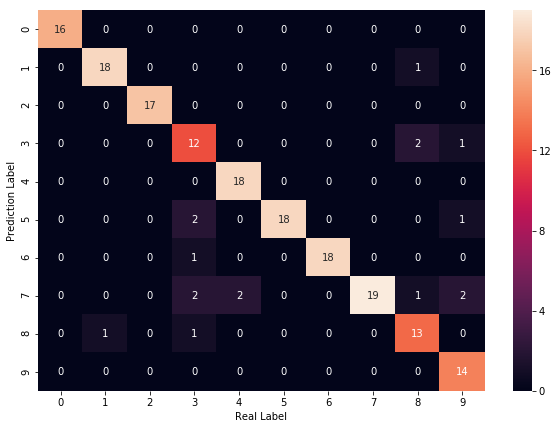

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 19., 17., 15., 18., 21., 19., 26., 15., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:126 index:[5] real:5
#1 min_error:154 index:[2] real:2
#2 min_error:166 index:[8] real:8
#3 min_error:48 index:[0] real:0
#4 min_error:132 index:[1] real:1
#5 min_error:93 index:[7] real:7
#6 min_error:71 index:[6] real:6
#7 min_error:112 index:[3] real:3
#8 min_error:87 index:[2] real:2
#9 min_error:134 index:[1] real:1
#10 min_error:154 index:[7] real:7
#11 min_error:159 index:[7] real:4
#12 min_error:79 index:[6] real:6
#13 min_error:119 index:[3] real:3
#14 min_error:123 index:[1] real:1
#15 min_error:147 index:[3] real:3
#16 min_error:158 index:[7] real:9
#17 min_error:113 index:[1] real:1
#18 min_error:123 index:[7] real:7
#19 min_error:50 index:[6] real:6
#20 min_error:152 index:[8] real:8
#21 min_error:72 index:[4] real:4
#22 min_error:105 index:[3] real:3
#23 min_error:132 index:[1] real:1
#24 min_error:82 index:[4] real:4
#25 min_error:59 index:[0] real:0
#26 min_error:91 index:[5] real:5
#27 min_error:103 index:[3] real:3
#28 min_error:139 index:[6] real:6
#29 m

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8763 Total connections::8813


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9047619047619048
Avg Base Learner:0.7842057299703372
